# UMAP of PSPA & KD seq

In [ ]:
import pandas as pd
from katlas.core import *
from katlas.plot import *

## kinase info + PSPA data

In [ ]:
df = Data.get_kinase_info()

In [ ]:
df.columns

Index(['kinase', 'ID_coral', 'uniprot', 'ID_HGNC', 'modi_group', 'group',
       'family', 'subfamily_coral', 'subfamily', 'in_pspa_st', 'in_pspa_tyr',
       'in_pspa', 'in_cddm', 'kd_ID', 'active_D1_D2', 'active_kd_ID',
       'pspa_ID', 'pseudo', 'pspa_category_small', 'pspa_category_big',
       'cddm_big', 'cddm_small', 'length', 'human_uniprot_sequence',
       'kinasecom_domain', 'nucleus', 'cytosol', 'cytoskeleton',
       'plasma membrane', 'mitochondrion', 'Golgi apparatus',
       'endoplasmic reticulum', 'vesicle', 'centrosome', 'aggresome',
       'main_location'],
      dtype='object')

Filter active kd ID and in PSPA

In [ ]:
pspa_info = df[df.active_kd_ID.notna() & df.in_pspa]

In [ ]:
cols = ['kinase','uniprot','modi_group','pspa_category_big','pspa_category_small','family','subfamily','kd_ID']

In [ ]:
pspa_info = pspa_info[cols]

The step above when merge, automatically filter out those with _TYR ( they are very non-specific, we'll remove them)

## Umap plot of PSPA PSSM

In [ ]:
pspa=Data.get_pspa_all_scale().reset_index()

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/logomaker/../sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/logomaker/../umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


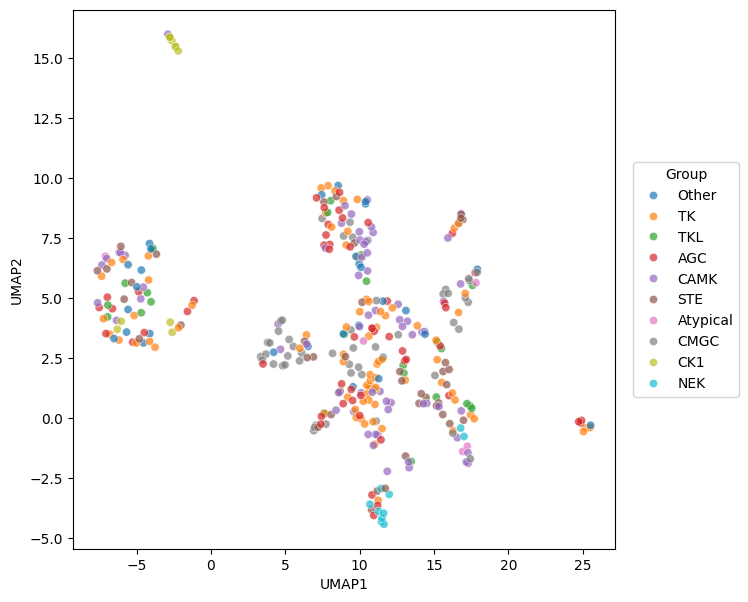

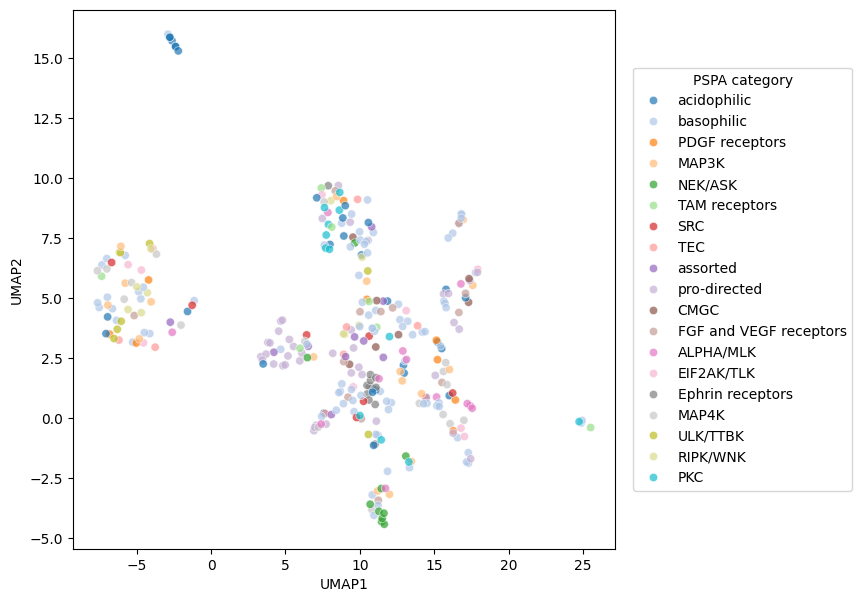

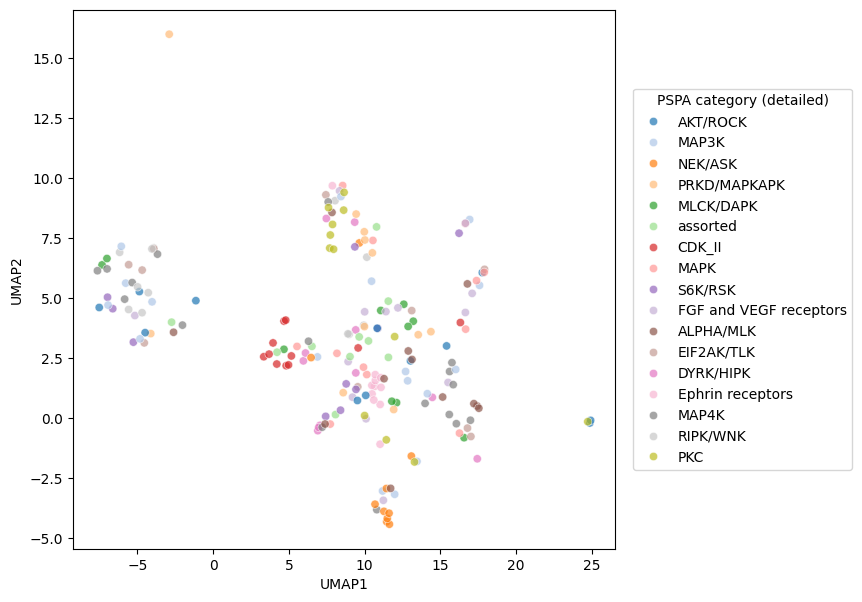

In [ ]:
plot_group_pspa_category(pspa_info,pspa)

In [ ]:
pspa=Data.get_pspa_all_scale().reset_index()

In [ ]:
# add kinase info
info= pspa_info.merge(pspa)

In [ ]:
feat = pspa_info_pssm.iloc[:,-230:]

In [ ]:
embed = reduce_feature(feat,'umap',5,min_dist=0.6)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/logomaker/../sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/logomaker/../umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


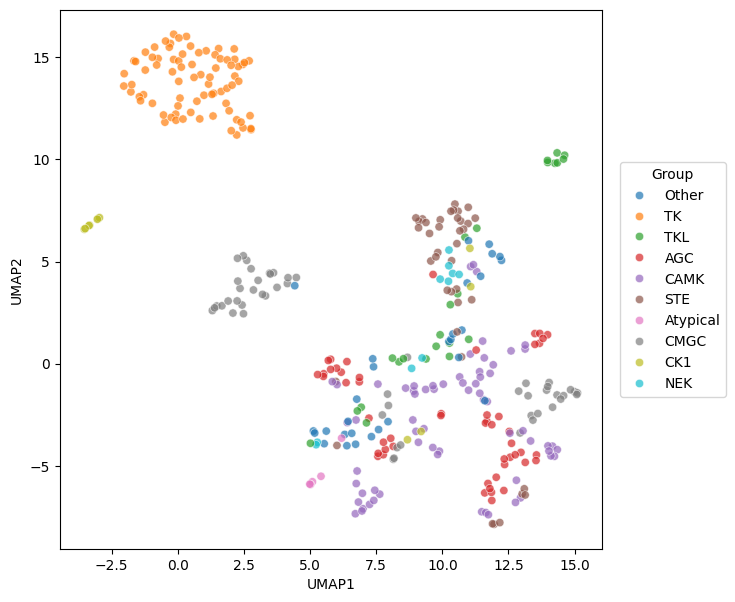

In [ ]:
plot_2d(embed,hue=pspa_info_pssm.modi_group,hue_title='Group')

In [ ]:
def get_hue_big(df,
                hue_col, # column of hue
                cnt_thr=10, # higher or equal to this threshold will be considered
               ):
    "Get part of hue according to its value counts; applied when the groups are too many."
    cnt = df[hue_col].value_counts()
    names = cnt[cnt>=cnt_thr].index
    return df[hue_col][df[hue_col].isin(names)]

In [ ]:
hue_pspa = get_hue_big(info,'pspa_category_big',7)

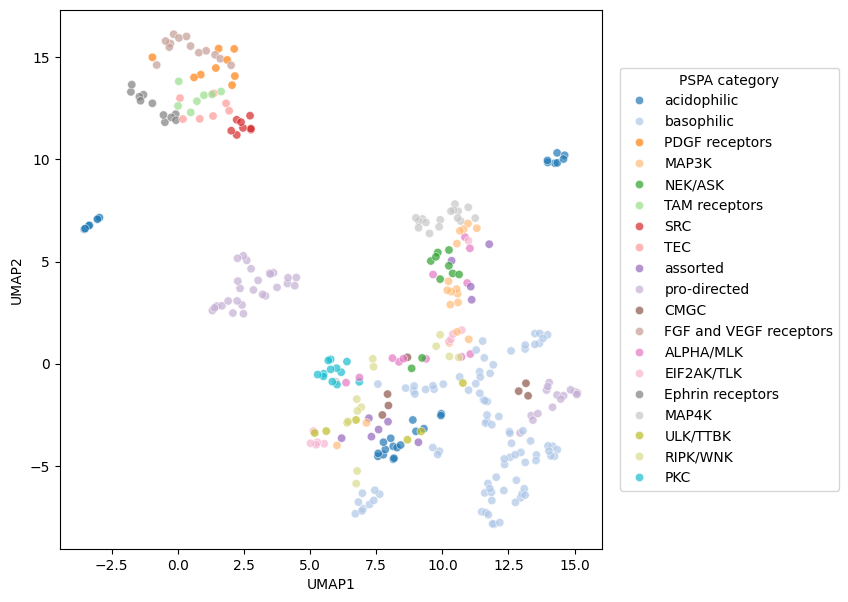

In [ ]:
plot_2d(embed,hue=hue_pspa,hue_title='PSPA category',palette='tab20')

In [ ]:
hue_pspa = get_hue_big(info,'pspa_category_small',10)

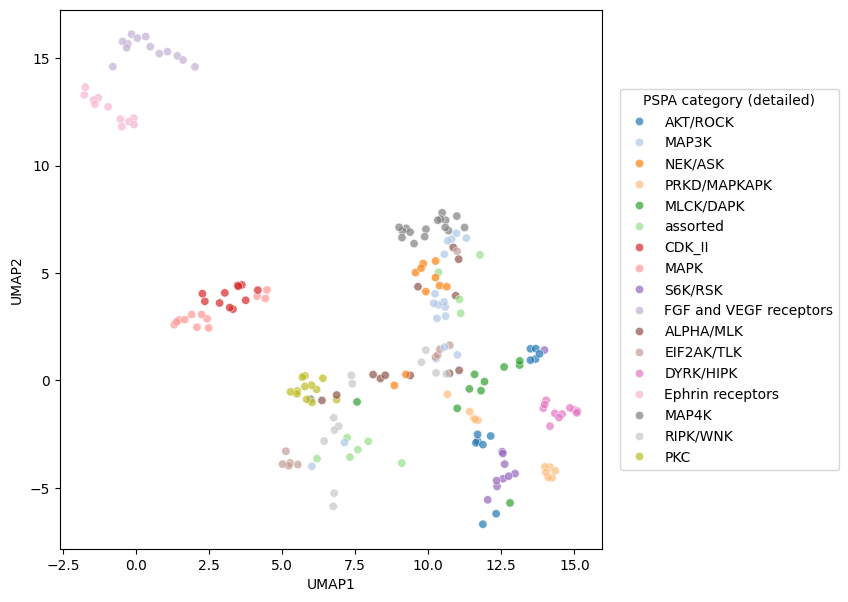

In [ ]:
plot_2d(embed,hue=hue_pspa,hue_title='PSPA category (detailed)',palette='tab20')

In [ ]:
# plot_2d(embed,hue=pspa_info_pssm.subfamily,hue_title='Subfamily')

## Func that wrap all

In [ ]:
def plot_group_pspa_category(info_df, # info df that contain key column for merge with feat_df
                             feat_df, # firt column is key column
                             n_neighbors,
                             min_dist,
                            ):
    merged= info_df.merge(feat_df)

    # Get UMAP embedding
    feat_col = feat_df.columns[1:]
    print('feature columns:', len(feat_col))
    feat = merged[feat_col]
    print('row numbers:', len(feat))
    embed = reduce_feature(feat,'umap',n_neighbors,min_dist=min_dist)

    # Colored by group
    plot_2d(embed,hue=merged.modi_group,hue_title='Group',palette='tab20')

    # Colored by pspa category
    hue_pspa = get_hue_big(merged,'pspa_category_big',10)
    plot_2d(embed,hue=hue_pspa,hue_title='PSPA category',palette='tab20')

    # Colored by pspa category in details
    hue_pspa = get_hue_big(merged,'pspa_category_small',10)
    plot_2d(embed,hue=hue_pspa,hue_title='PSPA category (detailed)',palette='tab20')

feature columns: 230


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/logomaker/../sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/logomaker/../umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


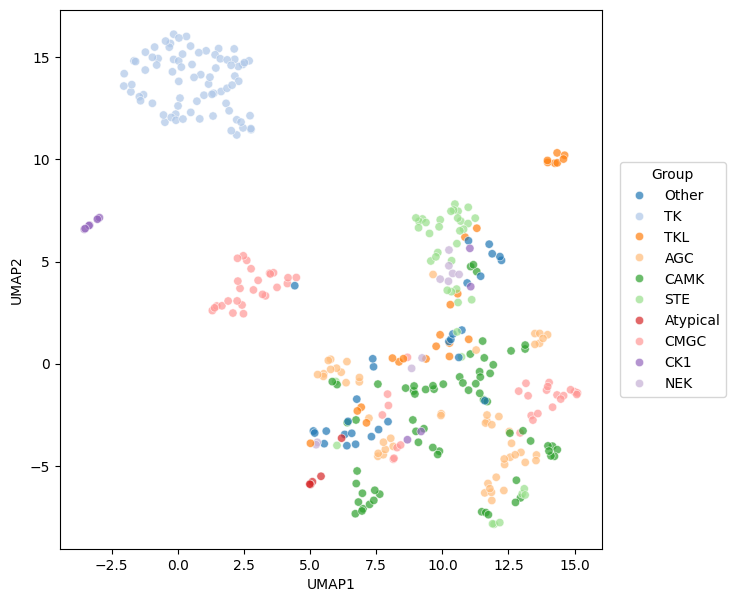

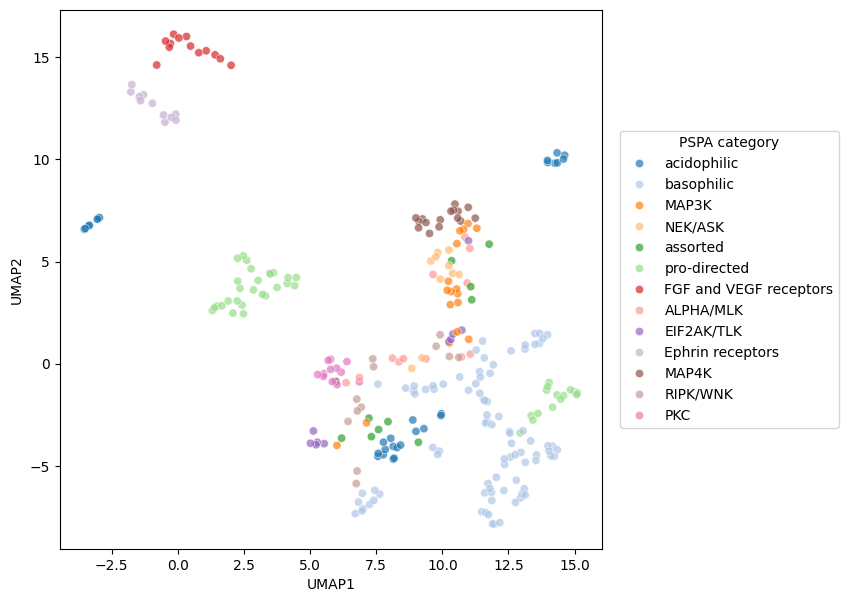

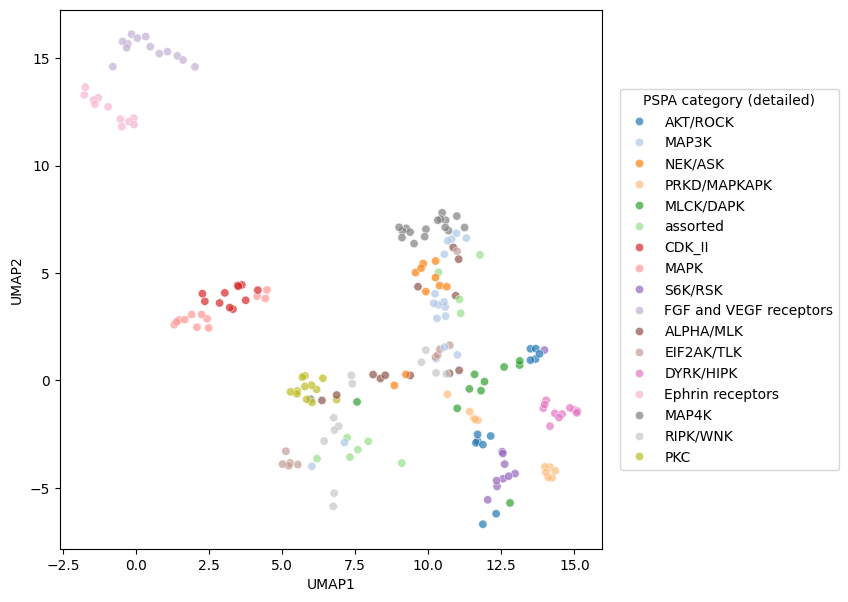

In [ ]:
plot_group_pspa_category(pspa_info,pspa,n_neighbors=5,min_dist=0.6)

## Umap plot of T5 on uniprot kd

In [ ]:
t5 = pd.read_parquet('out/uniprot_kd_t5.parquet').reset_index()

In [ ]:
t5.head()

,kd_ID,T5_0,T5_1,T5_2,T5_3,T5_4,T5_5,T5_6,T5_7,T5_8,...,T5_1014,T5_1015,T5_1016,T5_1017,T5_1018,T5_1019,T5_1020,T5_1021,T5_1022,T5_1023
0,A0A075F7E9_LERK1_ORYSI_KD1,0.014122,0.068848,0.016098,-0.001535,-0.001333,0.021378,0.030289,-0.062408,0.028442,...,-0.029327,0.014893,-0.006218,-0.069824,0.044067,-0.009636,-0.007458,0.021240,0.005234,-0.034637
1,A0A078BQP2_GCY25_CAEEL_KD1,-0.001307,-0.030319,0.020981,0.026642,-0.012787,0.034088,-0.028961,-0.105713,-0.018692,...,-0.038696,-0.036804,-0.016571,-0.072998,0.060852,0.044586,0.002766,-0.014633,0.046051,0.004398
2,A0A078CGE6_M3KE1_BRANA_KD1,0.054504,0.093750,-0.007454,0.018860,-0.042267,-0.005390,-0.004925,-0.046814,-0.013489,...,-0.016037,0.000752,-0.038391,-0.041382,0.069580,-0.022369,-0.026276,-0.001382,0.006645,-0.034485
3,A0A0G2K344_PK3CA_RAT_KD1,0.030807,0.127075,0.007271,-0.018631,0.007950,0.019165,-0.024902,-0.068176,-0.020386,...,-0.018188,-0.014389,-0.023575,0.006779,0.052277,-0.052155,-0.023071,0.034332,0.002714,-0.007095
4,A0A0H2ZM62_HK06_STRP2_KD1,0.020813,-0.063660,-0.013458,0.045715,-0.035828,0.039062,0.024445,-0.089233,0.005287,...,-0.054688,0.024170,0.007973,-0.101318,0.066223,0.005753,-0.048492,0.015091,0.024933,0.019699


feature columns: 1024


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/logomaker/../sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/logomaker/../umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


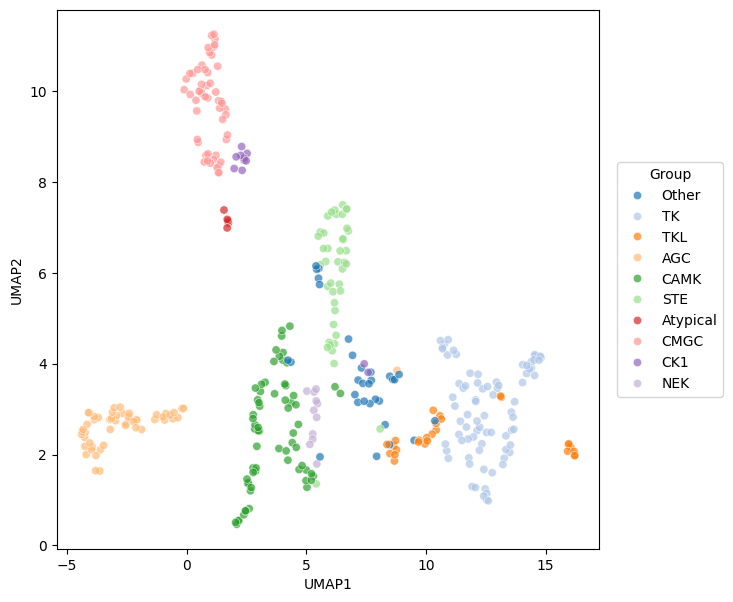

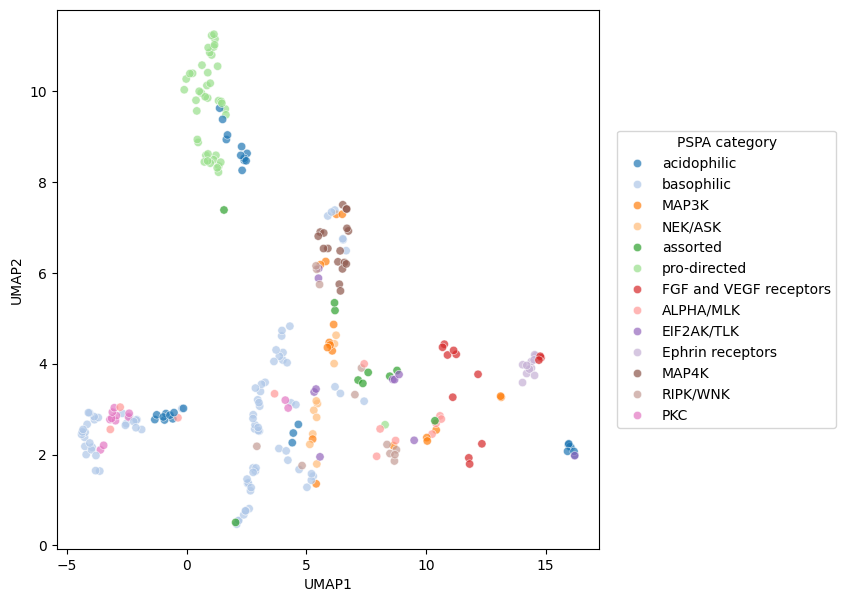

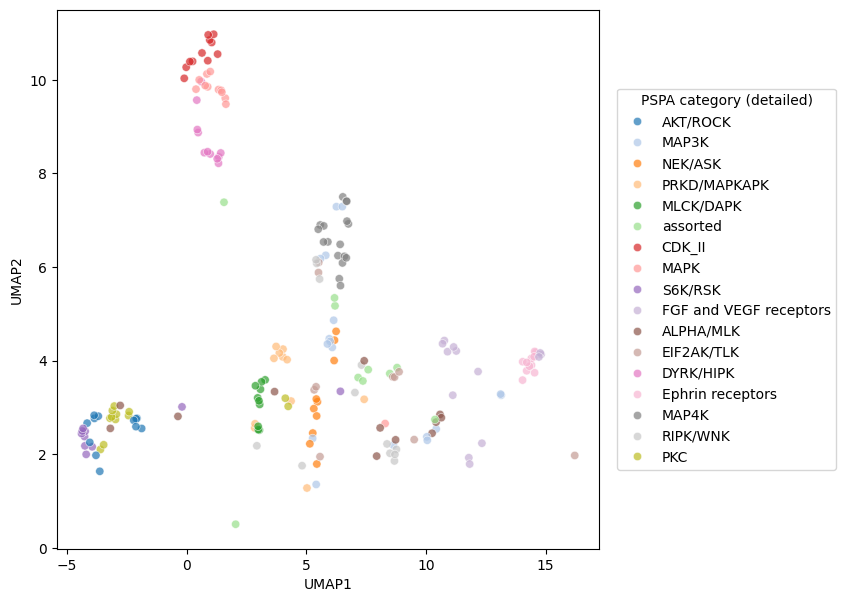

In [ ]:
plot_group_pspa_category(pspa_info,t5,n_neighbors=10,min_dist=0.3)

## Umap plot of T5 on Kinasecome sequence

In [ ]:
info = Data.get_kinase_info()

In [ ]:
info.columns

Index(['kinase', 'ID_coral', 'uniprot', 'ID_HGNC', 'modi_group', 'group',
       'family', 'subfamily_coral', 'subfamily', 'in_pspa_st', 'in_pspa_tyr',
       'in_pspa', 'in_cddm', 'kd_ID', 'active_D1_D2', 'active_kd_ID',
       'pspa_ID', 'pseudo', 'pspa_category_small', 'pspa_category_big',
       'cddm_big', 'cddm_small', 'length', 'human_uniprot_sequence',
       'kinasecom_domain', 'nucleus', 'cytosol', 'cytoskeleton',
       'plasma membrane', 'mitochondrion', 'Golgi apparatus',
       'endoplasmic reticulum', 'vesicle', 'centrosome', 'aggresome',
       'main_location'],
      dtype='object')

In [ ]:
kd_seq = info[['kd_ID','kinasecom_domain']]

In [ ]:
pspa_info_seq = pspa_info[cols].merge(kd_seq)

In [ ]:
from katlas.feature import *

In [ ]:
kinasecom = get_t5(pspa_info_seq,'kinasecom_domain')

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


  0%|          | 0/376 [00:00<?, ?it/s]

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/logomaker/../sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/logomaker/../umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


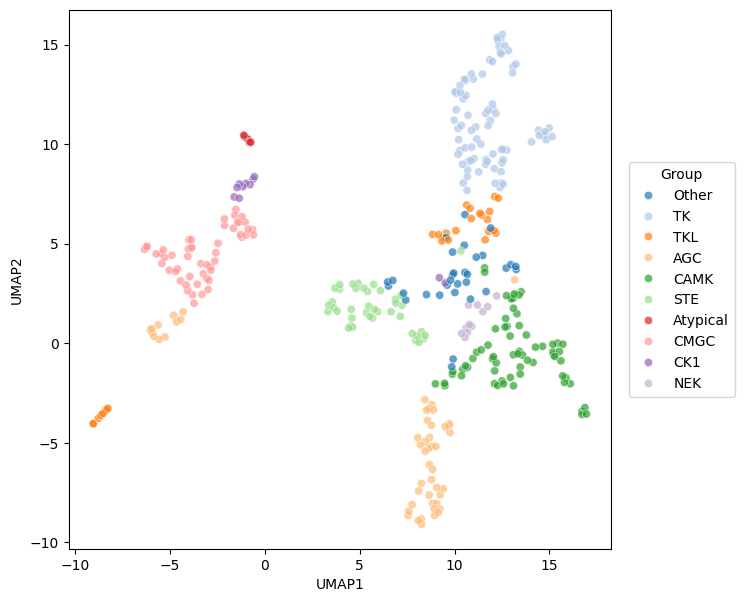

In [ ]:
embed = reduce_feature(kinasecom,'umap',5,min_dist=0.6)
plot_2d(embed,hue=pspa_info_seq.modi_group,hue_title='Group',palette='tab20')

## Onehot encode

In [ ]:
align = pd.read_parquet('out/uniprot_kd_align.parquet')

In [ ]:
align.shape

(5536, 3434)

In [ ]:
active=(align[1525]=='D')& (align[1724]=='D')

In [ ]:
active.value_counts()

True     4209
False    1327
Name: count, dtype: int64

In [ ]:
align = align[active]

In [ ]:
# check 'pseudo alignment' nbs to know how to get freq_max
freq_max = pd.read_csv('out/align_freq_max_aa.csv')

In [ ]:
freq_max

,position,aa,max_value
0,1549,N,0.815390
1,2618,D,0.809429
2,1724,D,0.800759
3,1525,D,0.791004
4,1730,G,0.775470
...,...,...,...
214,193,E,0.101879
215,640,G,0.101879
216,922,L,0.101337
217,603,R,0.101156


In [ ]:
onehot_col = freq_max[freq_max.max_value>0.05].position.sort_values().tolist()

In [ ]:
onehot = align[onehot_col]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def get_onehot(df):
    df=df.copy()
    encoded_df = pd.DataFrame(index=df.index)
    
    encoder = OneHotEncoder(sparse_output=False, dtype=int, handle_unknown='ignore')
    
    for col in df.columns:
        reshaped = df[[col]]  # keep as DataFrame
        encoded = encoder.fit_transform(reshaped)
        aa_labels = encoder.categories_[0]
        new_col_names = [f"{col}_{aa}" for aa in aa_labels]
        encoded_subdf = pd.DataFrame(encoded,index=df.index)
        encoded_subdf.columns=new_col_names
        encoded_df = pd.concat([encoded_df, encoded_subdf], axis=1)
    return encoded_df

In [ ]:
encoded_active=get_onehot(onehot)

## Umap of onehot

In [ ]:
feat_df = encoded_active.reset_index()

feature columns: 4071
row numbers: 376


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/logomaker/../sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/logomaker/../umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


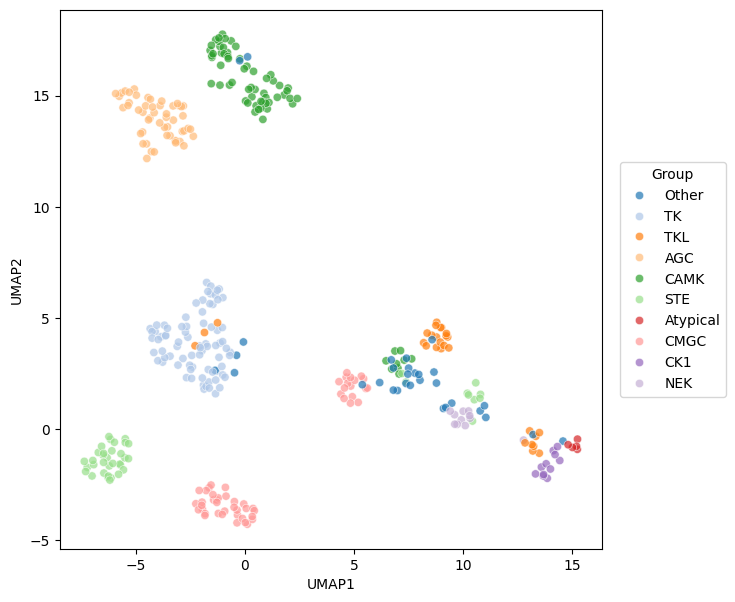

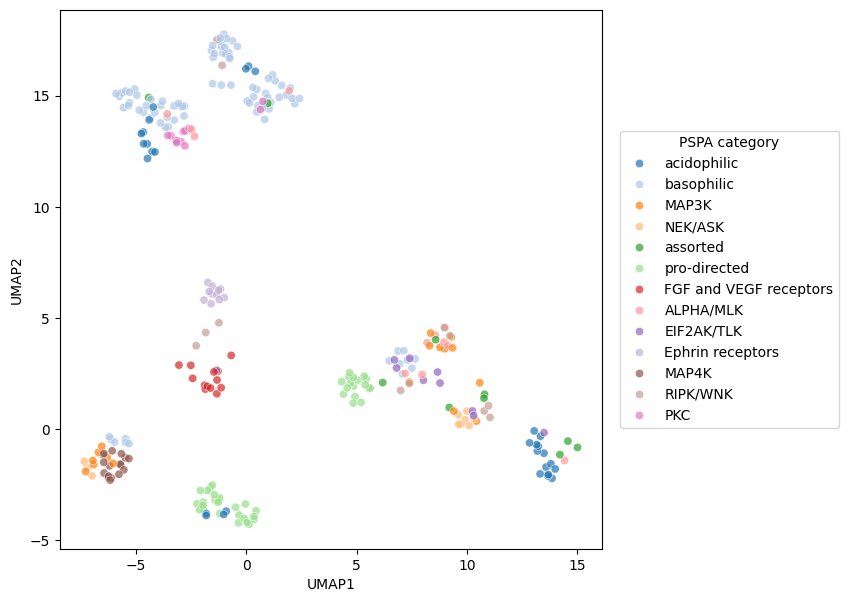

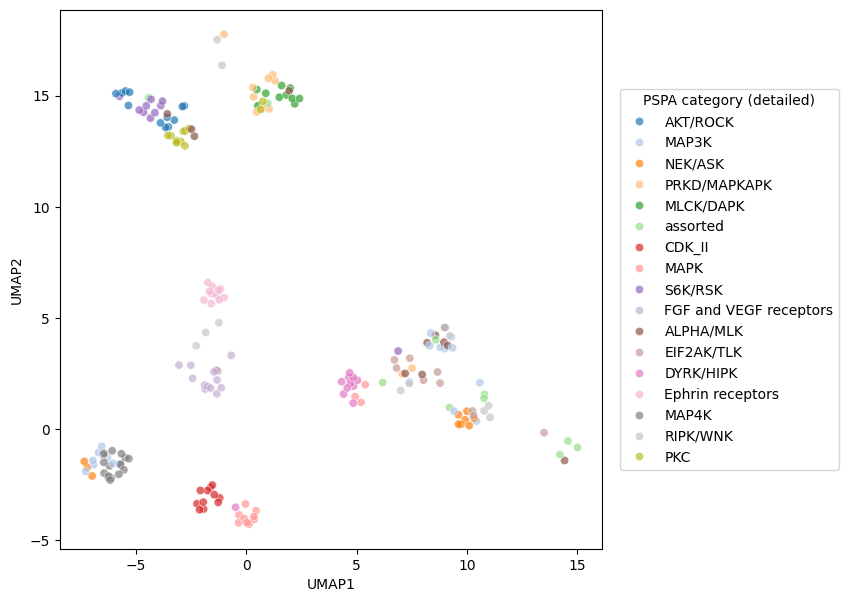

In [ ]:
plot_group_pspa_category(pspa_info,feat_df,n_neighbors=15,min_dist=0.7)

In [ ]:
embed = reduce_feature(encoded_active,
                        'umap',
                        complexity=20,
                       min_dist=0.5
                       )

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/logomaker/../sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/logomaker/../umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
hue_is_PSPA=embed.index.isin(pspa_info.kd_ID)

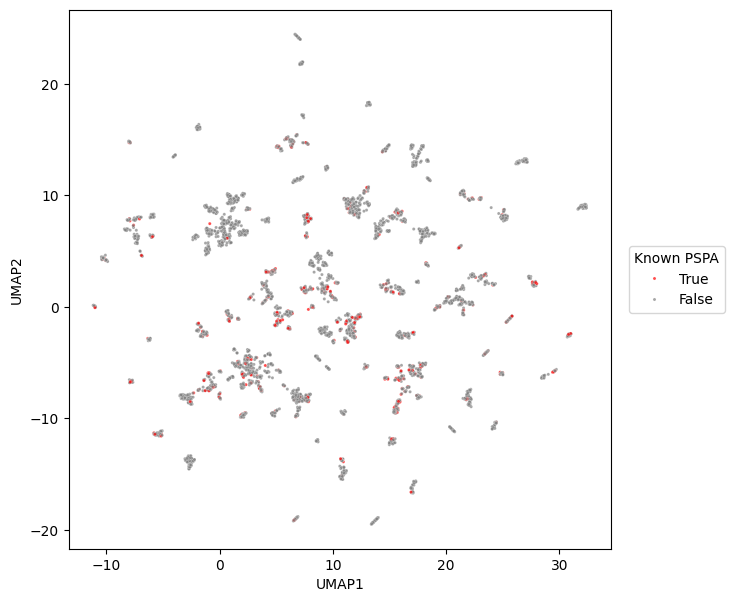

In [ ]:
plot_2d(embed,
        hue_title='Known PSPA',
        # alpha=0.5,
        hue = hue_is_PSPA,
        hue_order=[True, False],
        s=5,
        palette={True: 'red', False: 'gray'})

## PSPA kd plot

In [ ]:
encoded_df = get_onehot(onehot_pspa)

In [ ]:
encoded_df

,65_-,65_A,65_C,65_E,65_F,65_I,65_K,65_L,65_N,65_Q,...,3192_K,3192_L,3192_M,3192_Q,3192_R,3192_S,3192_T,3192_V,3192_W,3192_Y
kd_ID,,,,,,,,,,,,,,,,,,,,,
Q2M2I8_AAK1_HUMAN_KD1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
P27037_AVR2A_HUMAN_KD1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Q13705_AVR2B_HUMAN_KD1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
P31749_AKT1_HUMAN_KD1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
P31751_AKT2_HUMAN_KD1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P17948_VGFR1_HUMAN_KD1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
P35968_VGFR2_HUMAN_KD1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
P35916_VGFR3_HUMAN_KD1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
umap2d = reduce_feature(encoded_df,
                        'umap',
                        complexity=15,
                       min_dist=0.7
                       )

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
hue_pspa = pspa_active_kd_remove2kd.set_index('kd_ID')['pspa_category']
hue_group = pspa_active_kd_remove2kd.set_index('kd_ID')['group']

In [ ]:
enrich_group = hue_pspa.value_counts()[hue_pspa.value_counts()>10].index

In [ ]:
hue_pspa_partial = hue_pspa[hue_pspa.isin(enrich_group)]

In [ ]:
group_color = pd.read_csv('raw/group_color.csv')

In [ ]:
group_color = group_color.set_index('Label')['Color'].to_dict()

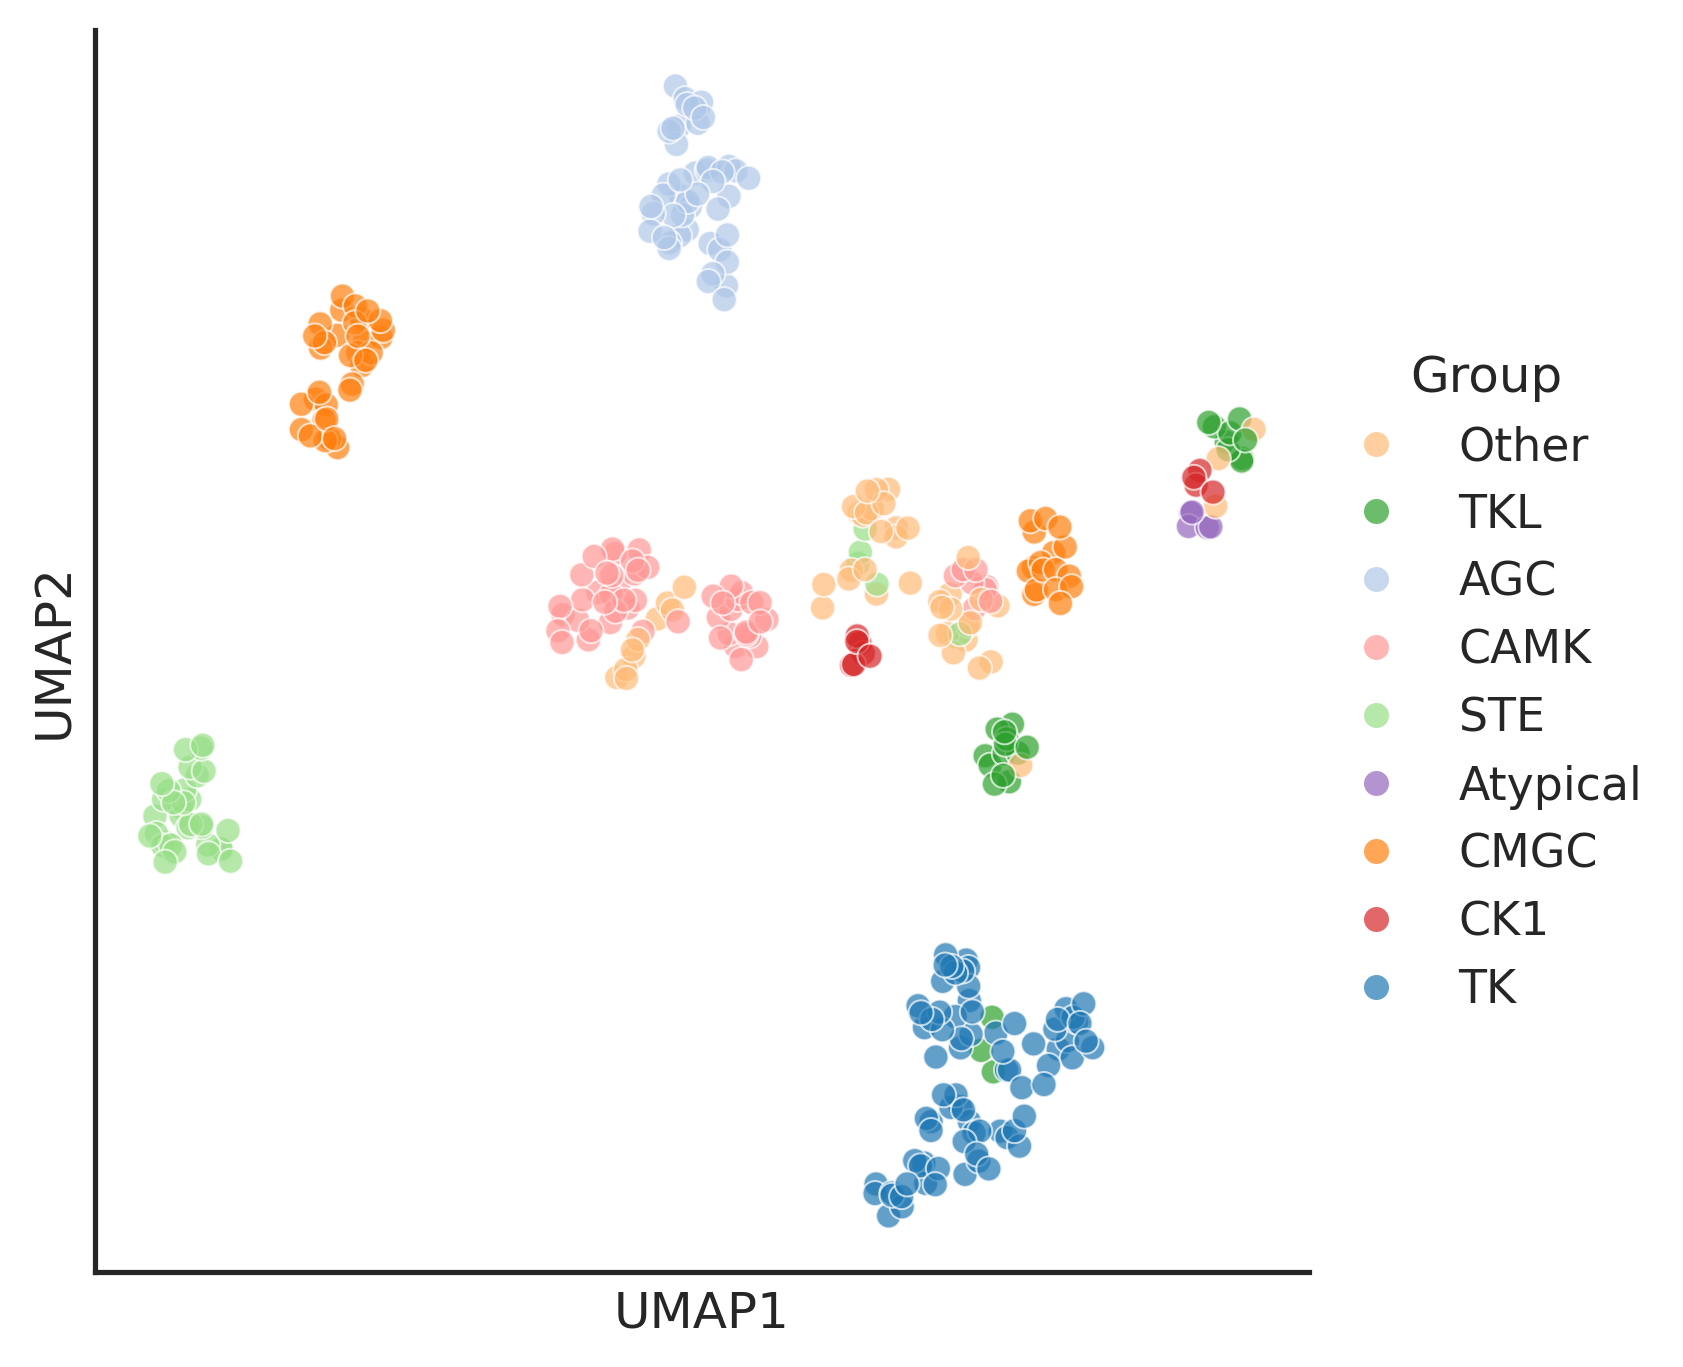

In [ ]:
plot_umap(umap2d,box_title='Group',hue=hue_group, palette=group_color)

In [ ]:
pspa_color = get_color_dict(hue_pspa_partial.unique())

In [ ]:
def rgb_to_hex(rgb_dict):
    """
    Convert a dictionary with RGB values in [0, 1] to hex color codes.
    """
    hex_dict = {
        key: '#{:02X}{:02X}{:02X}'.format(
            int(r * 255), int(g * 255), int(b * 255)
        )
        for key, (r, g, b) in rgb_dict.items()
    }
    return hex_dict

In [ ]:
pspa_color = rgb_to_hex(pspa_color)

In [ ]:
pspa_color = pd.DataFrame.from_dict(pspa_color,orient='index').reset_index()

In [ ]:
pspa_color.columns=['Label','Color']

In [ ]:
# pspa_color.to_csv('raw/pspa_color.csv',index=False)

In [ ]:
pspa_color=pd.read_csv('raw/pspa_color.csv')

In [ ]:
pspa_color = pspa_color.set_index('Label')['Color'].to_dict()

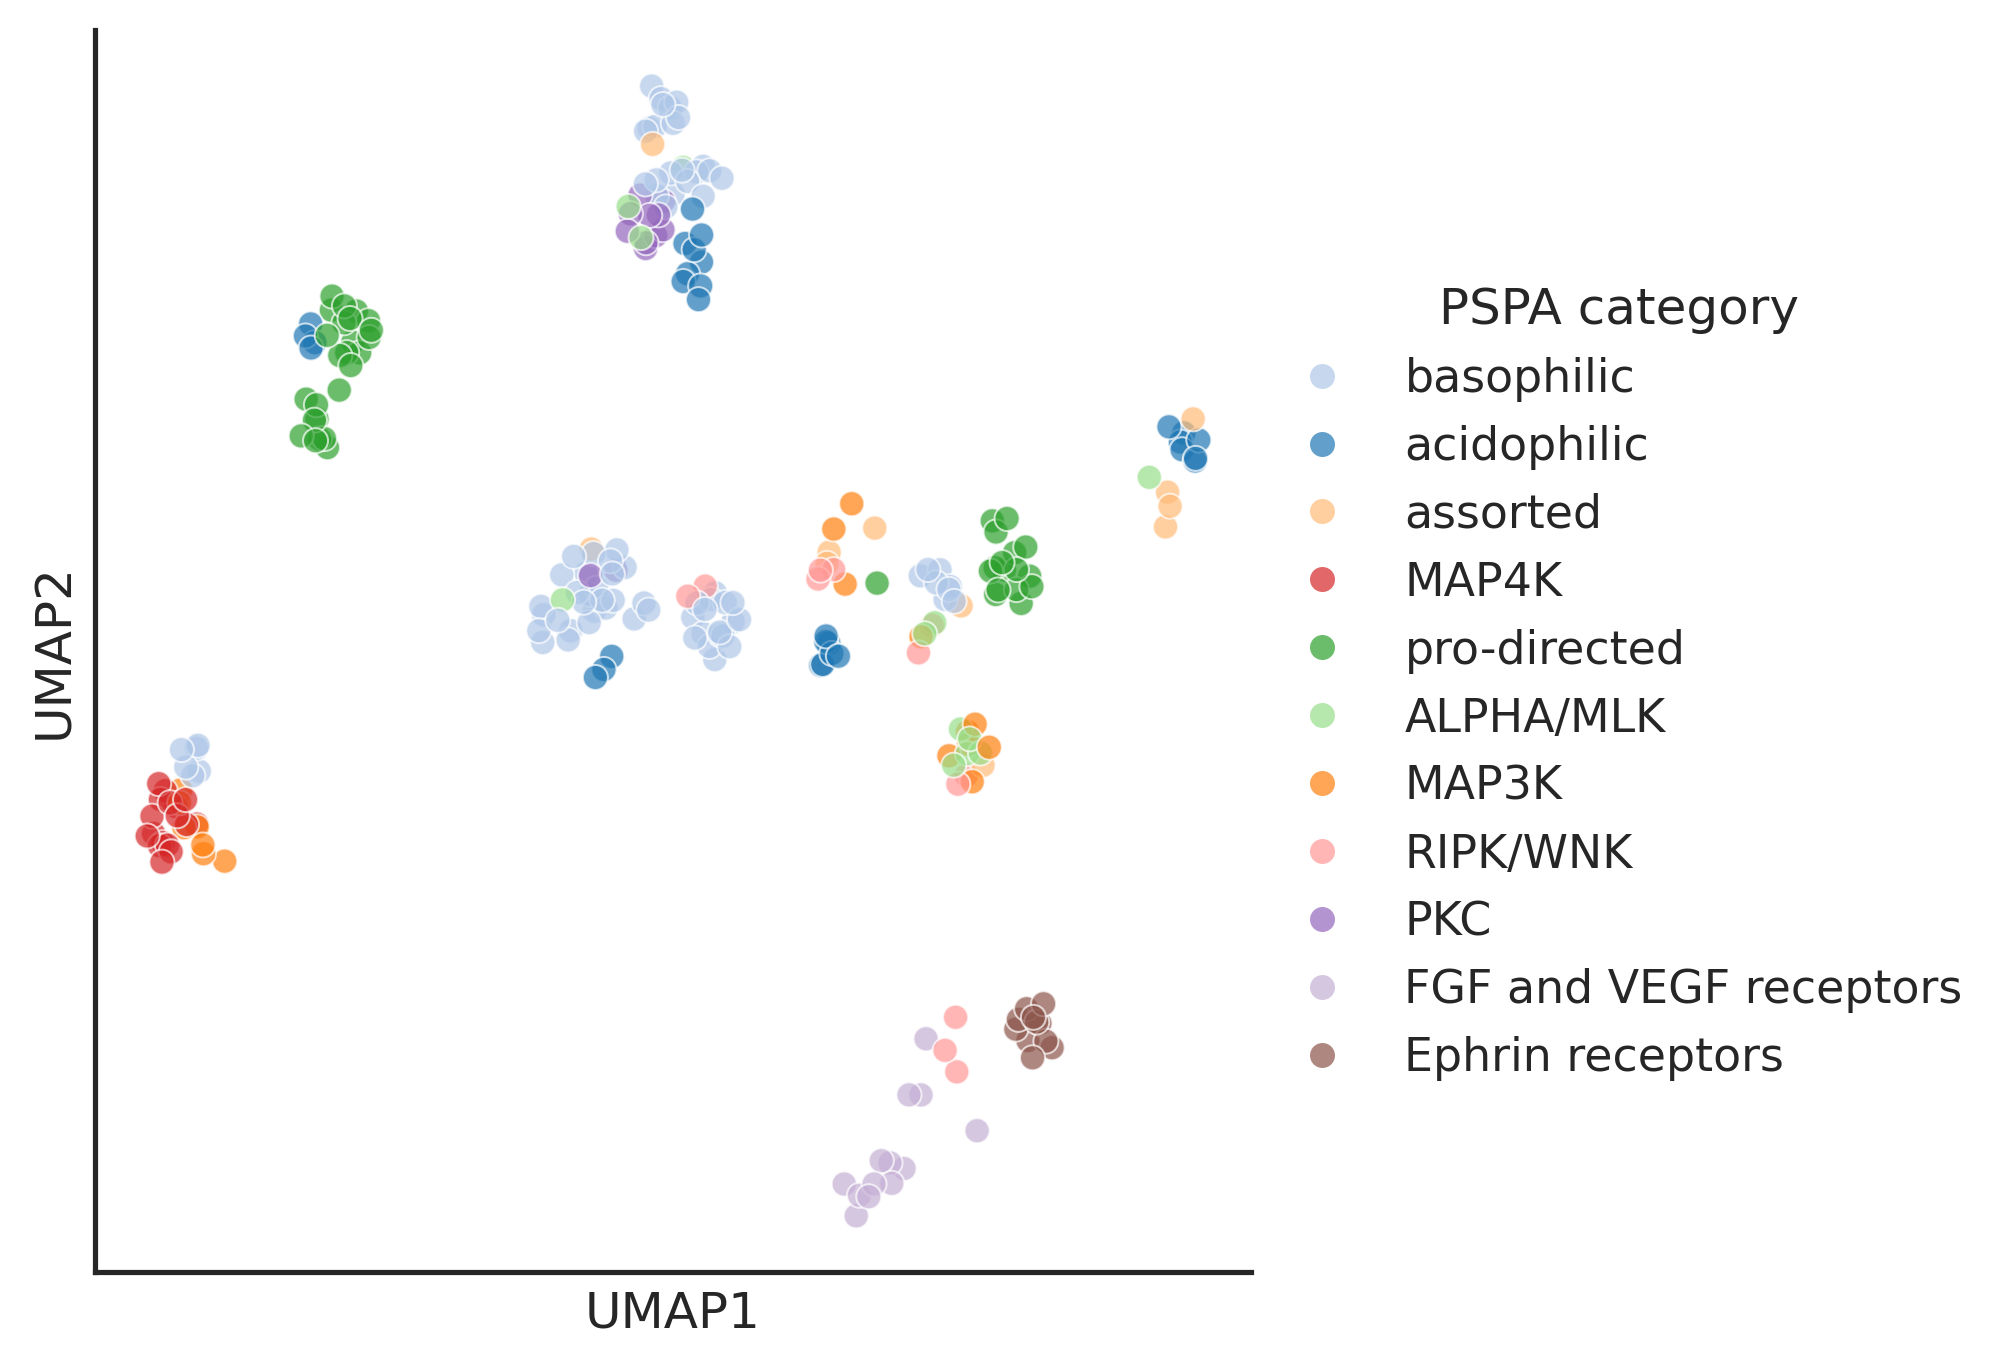

In [ ]:
plot_umap(umap2d,box_title='PSPA category',hue=hue_pspa_partial,palette=pspa_color)

## Old

## Merge with human PSPA

In [ ]:
human_active = kd[kd.Organism=='Homo sapiens (Human)']

In [ ]:
human_active[human_active.Uniprot.duplicated(keep=False)]

,kd_ID,Uniprot,Entry Name,Protein names,Gene Names,Gene Names (primary),Organism,kd_note,kd_evidence,kd_start,...,Interacts with,Subunit structure,Function [CC],Activity regulation,full_seq,D1,D2,D3,N1,active_D1_D2
732,O75582_KS6A5_HUMAN_KD1,O75582,KS6A5_HUMAN,Ribosomal protein S6 kinase alpha-5 (S6K-alpha...,RPS6KA5 MSK1,RPS6KA5,Homo sapiens (Human),Protein kinase 1,ECO:0000255|PROSITE-ProRule:PRU00159,49,...,P67870; Q9UI47-2; Q9Y4C1; Q9NYL2; Q16539; Q9Y4C1,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Activated by phosphorylat...,MEEEGGSSGGAAGTSADGGDGGEQLLTVKHELRTANLTGHAEKVGI...,1,1,1,1,1
733,O75582_KS6A5_HUMAN_KD2,O75582,KS6A5_HUMAN,Ribosomal protein S6 kinase alpha-5 (S6K-alpha...,RPS6KA5 MSK1,RPS6KA5,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,426,...,P67870; Q9UI47-2; Q9Y4C1; Q9NYL2; Q16539; Q9Y4C1,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Activated by phosphorylat...,MEEEGGSSGGAAGTSADGGDGGEQLLTVKHELRTANLTGHAEKVGI...,1,1,1,1,1
734,O75676_KS6A4_HUMAN_KD1,O75676,KS6A4_HUMAN,Ribosomal protein S6 kinase alpha-4 (S6K-alpha...,RPS6KA4 MSK2,RPS6KA4,Homo sapiens (Human),Protein kinase 1,ECO:0000255|PROSITE-ProRule:PRU00159,33,...,Q16539; O14901,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Activated by phosphorylat...,MGDEDDDESCAVELRITEANLTGHEEKVSVENFELLKVLGTGAYGK...,1,1,1,1,1
735,O75676_KS6A4_HUMAN_KD2,O75676,KS6A4_HUMAN,Ribosomal protein S6 kinase alpha-4 (S6K-alpha...,RPS6KA4 MSK2,RPS6KA4,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,411,...,Q16539; O14901,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Activated by phosphorylat...,MGDEDDDESCAVELRITEANLTGHEEKVSVENFELLKVLGTGAYGK...,1,1,1,1,1
1462,P51812_KS6A3_HUMAN_KD1,P51812,KS6A3_HUMAN,Ribosomal protein S6 kinase alpha-3 (S6K-alpha...,RPS6KA3 ISPK1 MAPKAPK1B RSK2,RPS6KA3,Homo sapiens (Human),Protein kinase 1,ECO:0000255|PROSITE-ProRule:PRU00159,68,...,P46379-2; P67870; P09471; P08238; O14901; P284...,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Upon extracellular signal...,MPLAQLADPWQKMAVESPSDSAENGQQIMDEPMGEEEINPQTEEVS...,1,1,1,1,1
1463,P51812_KS6A3_HUMAN_KD2,P51812,KS6A3_HUMAN,Ribosomal protein S6 kinase alpha-3 (S6K-alpha...,RPS6KA3 ISPK1 MAPKAPK1B RSK2,RPS6KA3,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,422,...,P46379-2; P67870; P09471; P08238; O14901; P284...,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Upon extracellular signal...,MPLAQLADPWQKMAVESPSDSAENGQQIMDEPMGEEEINPQTEEVS...,1,1,1,1,1
1957,Q15349_KS6A2_HUMAN_KD1,Q15349,KS6A2_HUMAN,Ribosomal protein S6 kinase alpha-2 (S6K-alpha...,RPS6KA2 MAPKAPK1C RSK3,RPS6KA2,Homo sapiens (Human),Protein kinase 1,ECO:0000255|PROSITE-ProRule:PRU00159,59,...,P05067; P15056; P67870; O14901; P28482; Q02156...,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Upon extracellular signal...,MDLSMKKFAVRRFFSVYLRRKSRSKSSSLSRLEEEGVVKEIDISHH...,1,1,1,1,1
1958,Q15349_KS6A2_HUMAN_KD2,Q15349,KS6A2_HUMAN,Ribosomal protein S6 kinase alpha-2 (S6K-alpha...,RPS6KA2 MAPKAPK1C RSK3,RPS6KA2,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,415,...,P05067; P15056; P67870; O14901; P28482; Q02156...,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Upon extracellular signal...,MDLSMKKFAVRRFFSVYLRRKSRSKSSSLSRLEEEGVVKEIDISHH...,1,1,1,1,1
1960,Q15418_KS6A1_HUMAN_KD1,Q15418,KS6A1_HUMAN,Ribosomal protein S6 kinase alpha-1 (S6K-alpha...,RPS6KA1 MAPKAPK1A RSK1,RPS6K

Kinase with two KDs have duplicates in the Uniprot ID:

In [ ]:
human_active[human_active.Uniprot.duplicated(keep=False)]

,kd_ID,Uniprot,Entry Name,Protein names,Gene Names,Gene Names (primary),Organism,kd_note,kd_evidence,kd_start,...,Interacts with,Subunit structure,Function [CC],Activity regulation,full_seq,D1,D2,D3,N1,active_D1_D2
732,O75582_KS6A5_HUMAN_KD1,O75582,KS6A5_HUMAN,Ribosomal protein S6 kinase alpha-5 (S6K-alpha...,RPS6KA5 MSK1,RPS6KA5,Homo sapiens (Human),Protein kinase 1,ECO:0000255|PROSITE-ProRule:PRU00159,49,...,P67870; Q9UI47-2; Q9Y4C1; Q9NYL2; Q16539; Q9Y4C1,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Activated by phosphorylat...,MEEEGGSSGGAAGTSADGGDGGEQLLTVKHELRTANLTGHAEKVGI...,1,1,1,1,1
733,O75582_KS6A5_HUMAN_KD2,O75582,KS6A5_HUMAN,Ribosomal protein S6 kinase alpha-5 (S6K-alpha...,RPS6KA5 MSK1,RPS6KA5,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,426,...,P67870; Q9UI47-2; Q9Y4C1; Q9NYL2; Q16539; Q9Y4C1,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Activated by phosphorylat...,MEEEGGSSGGAAGTSADGGDGGEQLLTVKHELRTANLTGHAEKVGI...,1,1,1,1,1
734,O75676_KS6A4_HUMAN_KD1,O75676,KS6A4_HUMAN,Ribosomal protein S6 kinase alpha-4 (S6K-alpha...,RPS6KA4 MSK2,RPS6KA4,Homo sapiens (Human),Protein kinase 1,ECO:0000255|PROSITE-ProRule:PRU00159,33,...,Q16539; O14901,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Activated by phosphorylat...,MGDEDDDESCAVELRITEANLTGHEEKVSVENFELLKVLGTGAYGK...,1,1,1,1,1
735,O75676_KS6A4_HUMAN_KD2,O75676,KS6A4_HUMAN,Ribosomal protein S6 kinase alpha-4 (S6K-alpha...,RPS6KA4 MSK2,RPS6KA4,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,411,...,Q16539; O14901,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Activated by phosphorylat...,MGDEDDDESCAVELRITEANLTGHEEKVSVENFELLKVLGTGAYGK...,1,1,1,1,1
1462,P51812_KS6A3_HUMAN_KD1,P51812,KS6A3_HUMAN,Ribosomal protein S6 kinase alpha-3 (S6K-alpha...,RPS6KA3 ISPK1 MAPKAPK1B RSK2,RPS6KA3,Homo sapiens (Human),Protein kinase 1,ECO:0000255|PROSITE-ProRule:PRU00159,68,...,P46379-2; P67870; P09471; P08238; O14901; P284...,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Upon extracellular signal...,MPLAQLADPWQKMAVESPSDSAENGQQIMDEPMGEEEINPQTEEVS...,1,1,1,1,1
1463,P51812_KS6A3_HUMAN_KD2,P51812,KS6A3_HUMAN,Ribosomal protein S6 kinase alpha-3 (S6K-alpha...,RPS6KA3 ISPK1 MAPKAPK1B RSK2,RPS6KA3,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,422,...,P46379-2; P67870; P09471; P08238; O14901; P284...,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Upon extracellular signal...,MPLAQLADPWQKMAVESPSDSAENGQQIMDEPMGEEEINPQTEEVS...,1,1,1,1,1
1957,Q15349_KS6A2_HUMAN_KD1,Q15349,KS6A2_HUMAN,Ribosomal protein S6 kinase alpha-2 (S6K-alpha...,RPS6KA2 MAPKAPK1C RSK3,RPS6KA2,Homo sapiens (Human),Protein kinase 1,ECO:0000255|PROSITE-ProRule:PRU00159,59,...,P05067; P15056; P67870; O14901; P28482; Q02156...,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Upon extracellular signal...,MDLSMKKFAVRRFFSVYLRRKSRSKSSSLSRLEEEGVVKEIDISHH...,1,1,1,1,1
1958,Q15349_KS6A2_HUMAN_KD2,Q15349,KS6A2_HUMAN,Ribosomal protein S6 kinase alpha-2 (S6K-alpha...,RPS6KA2 MAPKAPK1C RSK3,RPS6KA2,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,415,...,P05067; P15056; P67870; O14901; P28482; Q02156...,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Upon extracellular signal...,MDLSMKKFAVRRFFSVYLRRKSRSKSSSLSRLEEEGVVKEIDISHH...,1,1,1,1,1
1960,Q15418_KS6A1_HUMAN_KD1,Q15418,KS6A1_HUMAN,Ribosomal protein S6 kinase alpha-1 (S6K-alpha...,RPS6KA1 MAPKAPK1A RSK1,RPS6K

In [ ]:
info=Data.get_kinase_info()

In [ ]:
info.to_csv('test.csv',index=False)

In [ ]:
kinase_map = info[['kinase','uniprot']]

Remove _b pseudo to get unique uniprot

In [ ]:
kinase_map = kinase_map[~kinase_map.kinase.str.contains('_b')]

In [ ]:
kinase_map = kinase_map.set_index('kinase')['uniprot']

In [ ]:
kinase_map[kinase_map.duplicated(keep=False)]

kinase
TEX14    Q8IWB6
TEX14    Q8IWB6
Name: uniprot, dtype: object

In [ ]:
kinase_map = kinase_map.drop_duplicates()

In [ ]:
# kinase_map.to_csv('out/kinase_map.csv')

In [ ]:
kinase_map

kinase
AAK1      Q2M2I8
ABL1      P00519
ABL2      P42684
TNK2      Q07912
ACVR2A    P27037
           ...  
YSK1      O00506
ZAK       Q9NYL2
ZAP70     P43403
EEF2K     O00418
FAM20C    Q8IXL6
Name: uniprot, Length: 509, dtype: object

## Add uniprot ID to PSPA

In [ ]:
pspa = Data.get_pspa_all_norm()

In [ ]:
pspa.index.duplicated().sum()

0

In [ ]:
a = pd.DataFrame(pspa.index)

In [ ]:
a['name']=a.kinase.str.split('_').str[0]

In [ ]:
a.groupby('name').agg({'kinase': lambda x: ','.join(x.unique())}).to_csv('raw/pspa_name.csv')

In [ ]:
idx = pspa.index.str.split('_').str[0]

In [ ]:
idx.map(kinase_map).isna().sum()

0

In [ ]:
idx

Index(['AAK1', 'ACVR2A', 'ACVR2B', 'AKT1', 'AKT2', 'AKT3', 'ALK2', 'ALK4',
       'ALPHAK3', 'AMPKA1',
       ...
       'NTRK3', 'TXK', 'TYK2', 'TYRO3', 'FLT1', 'KDR', 'FLT4', 'WEE1', 'YES1',
       'ZAP70'],
      dtype='object', name='kinase', length=396)

In [ ]:
pspa = pspa.reset_index()

In [ ]:
uniprot = pd.DataFrame(idx.map(kinase_map))

In [ ]:
uniprot.columns=['uniprot']

In [ ]:
pspa = pd.concat([uniprot,pspa],axis=1)

In [ ]:
# pspa.to_csv('out/pspa_uniprot.csv',index=False)

## PSPA with duplicated uniprot:

In [ ]:
pspa[pspa.uniprot.duplicated(keep=False)].sort_values('uniprot')

,uniprot,kinase,-5P,-5G,-5A,-5C,-5S,-5T,-5V,-5I,...,5H,5K,5R,5Q,5N,5D,5E,5s,5t,5y
22,Q13873,BMPR2,0.0558,0.0621,0.0638,0.0716,0.0571,0.0571,0.0597,0.0571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309,Q13873,BMPR2_TYR,0.0580,0.0617,0.0603,0.0661,0.0613,0.0613,0.0566,0.0580,...,0.0660,0.0665,0.0766,0.0607,0.0619,0.0648,0.0649,0.0702,0.0702,0.0653
212,Q15118,PDHK1,0.0451,0.0697,0.0594,0.0625,0.0594,0.0594,0.0573,0.0590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,Q15118,PDHK1_TYR,0.0590,0.0608,0.0528,0.0620,0.0608,0.0608,0.0439,0.0528,...,0.0676,0.0490,0.0539,0.0620,0.0647,0.0949,0.0797,0.0633,0.0633,0.0820
213,Q16654,PDHK4,0.0452,0.0645,0.0665,0.0672,0.0622,0.0622,0.0515,0.0619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
371,Q16654,PDHK4_TYR,0.0697,0.0690,0.0545,0.0772,0.0642,0.0642,0.0426,0.0483,...,0.0642,0.0486,0.0498,0.0755,0.0661,0.0836,0.0830,0.0686,0.0686,0.0892
221,Q9BXM7,PINK1,0.0516,0.0474,0.0612,0.0570,0.0523,0.0523,0.0474,0.0507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372,Q9BXM7,PINK1_TYR,0.0569,0.0585,0.0572,0.0643,0.0579,0.0579,0.0546,0.0555,...,0.0666,0.0818,0.1049,0.0636,0.0635,0.0525,0.0508,0.0516,0.0516,0.0611


In [ ]:
pspa_unique_uniprot = pspa[~pspa.uniprot.duplicated()]

## Remove other _TYR

Also remove other TYR due to their overall low specificity

In [ ]:
pspa_no_TYR = pspa_unique_uniprot[~pspa_unique_uniprot.kinase.str.contains('_TYR')]

In [ ]:
pspa_no_TYR = pspa_no_TYR.dropna(axis=1)

In [ ]:
# pspa_no_TYR.to_csv('out/pspa_uniprot_unique_no_TYR.csv',index=False)

In [ ]:
active_kd = pd.read_excel('out/uniprot_kd_active_D1_D2.xlsx')

In [ ]:
human_active[human_active.Uniprot.duplicated()]

,kd_ID,Uniprot,Entry Name,Protein names,Gene Names,Gene Names (primary),Organism,kd_note,kd_evidence,kd_start,...,Interacts with,Subunit structure,Function [CC],Activity regulation,full_seq,D1,D2,D3,N1,active_D1_D2
989,O75582_KS6A5_HUMAN_KD2,O75582,KS6A5_HUMAN,Ribosomal protein S6 kinase alpha-5 (S6K-alpha...,RPS6KA5 MSK1,RPS6KA5,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,426,...,P67870; Q9UI47-2; Q9Y4C1; Q9NYL2; Q16539; Q9Y4C1,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Activated by phosphorylat...,MEEEGGSSGGAAGTSADGGDGGEQLLTVKHELRTANLTGHAEKVGI...,1,1,1,1,1
991,O75676_KS6A4_HUMAN_KD2,O75676,KS6A4_HUMAN,Ribosomal protein S6 kinase alpha-4 (S6K-alpha...,RPS6KA4 MSK2,RPS6KA4,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,411,...,Q16539; O14901,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Activated by phosphorylat...,MGDEDDDESCAVELRITEANLTGHEEKVSVENFELLKVLGTGAYGK...,1,1,1,1,1
1919,P51812_KS6A3_HUMAN_KD2,P51812,KS6A3_HUMAN,Ribosomal protein S6 kinase alpha-3 (S6K-alpha...,RPS6KA3 ISPK1 MAPKAPK1B RSK2,RPS6KA3,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,422,...,P46379-2; P67870; P09471; P08238; O14901; P284...,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Upon extracellular signal...,MPLAQLADPWQKMAVESPSDSAENGQQIMDEPMGEEEINPQTEEVS...,1,1,1,1,1
2561,Q15349_KS6A2_HUMAN_KD2,Q15349,KS6A2_HUMAN,Ribosomal protein S6 kinase alpha-2 (S6K-alpha...,RPS6KA2 MAPKAPK1C RSK3,RPS6KA2,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,415,...,P05067; P15056; P67870; O14901; P28482; Q02156...,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Upon extracellular signal...,MDLSMKKFAVRRFFSVYLRRKSRSKSSSLSRLEEEGVVKEIDISHH...,1,1,1,1,1
2564,Q15418_KS6A1_HUMAN_KD2,Q15418,KS6A1_HUMAN,Ribosomal protein S6 kinase alpha-1 (S6K-alpha...,RPS6KA1 MAPKAPK1A RSK1,RPS6KA1,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,418,...,O43823; Q16543; P46527; P08238; P28482; P04271...,SUBUNIT: Forms a complex with either MAPK1/ERK...,FUNCTION: Serine/threonine-protein kinase that...,ACTIVITY REGULATION: Upon extracellular signal...,MPLAQLKEPWPLMELVPLDPENGQTSGEEAGLQPSKDEGVLKEISI...,1,1,1,1,1
2569,Q15772_SPEG_HUMAN_KD2,Q15772,SPEG_HUMAN,Striated muscle preferentially expressed prote...,SPEG APEG1 KIAA1297,SPEG,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,2966,...,Q99873; O75031; Q6FHY5; Q9NRD5; Q99873-3,SUBUNIT: Interacts with MTM1. Isoform 3 is fou...,FUNCTION: Isoform 3 may have a role in regulat...,NaN,MQKARGTRGEDAGTRAPPSPGVPPKRAKVGAGGGAPVAVAGAPVFL...,1,1,1,1,1
3481,Q5VST9_OBSCN_HUMAN_KD2,Q5VST9,OBSCN_HUMAN,Obscurin (EC 2.7.11.1) (Obscurin-RhoGEF) (Obsc...,OBSCN KIAA1556 KIAA1639,OBSCN,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,7672,...,Q8WZ42; P16157; P16157-17,SUBUNIT: Interacts (via protein kinase domain ...,FUNCTION: Structural component of striated mus...,NaN,MDQPQFSGAPRFLTRPKAFVVSVGKDATLSCQIVGNPTPQVSWEKD...,1,1,1,1,1
5339,Q9UK32_KS6A6_HUMAN_KD2,Q9UK32,KS6A6_HUMAN,Ribosomal protein S6 kinase alpha-6 (S6K-alpha...,RPS6KA6 RSK4,RPS6KA6,Homo sapiens (Human),Protein kinase 2,ECO:0000255|PROSITE-ProRule:PRU00159,426,...,Q7Z698,SUBUNIT: Forms a complex with MAPK3/ERK1 but n...,FUNCTION: Constitutively active serine/threoni...,ACTIVITY REGULATION: Constitutively activated ...,MLPFAPQDEPWDREMEVFSGGGASSGEVNGLKMVDEPMEEGEADSC...,1,1,1,1,1


In [ ]:
pspa_no_TYR.uniprot.isin(human_active.Uniprot).value_counts()

uniprot
True     368
False     13
Name: count, dtype: int64

PSPA not in human uniprot active kd:

In [ ]:
pspa_no_TYR[~pspa_no_TYR.uniprot.isin(human_active.Uniprot)]

,uniprot,kinase,-5P,-5G,-5A,-5C,-5S,-5T,-5V,-5I,...,4E,4s,4t,4y,0s,0t,0y,0S,0T,0Y
8,Q96QP1,ALPHAK3,0.0571,0.0478,0.0253,0.0384,0.0571,0.0571,0.0586,0.0602,...,0.0747,0.1142,0.1142,0.1744,0.1319,1.0000,0.0,0.1319,1.0000,0.0
18,O14874,BCKDK,0.0482,0.0672,0.0598,0.0694,0.0566,0.0566,0.0517,0.0467,...,0.0563,0.0401,0.0401,0.0859,1.0000,0.2348,0.0,1.0000,0.2348,0.0
26,O43683,BUB1,0.0899,0.0222,0.0249,0.0470,0.0286,0.0286,0.0319,0.0659,...,0.0250,0.0261,0.0261,0.0273,0.5413,1.0000,0.0,0.5413,1.0000,0.0
59,Q96QT4,CHAK1,0.0649,0.0823,0.0686,0.0995,0.0608,0.0608,0.0431,0.0313,...,0.0330,0.0400,0.0400,0.0318,1.0000,0.7003,0.0,1.0000,0.7003,0.0
60,Q9BX84,CHAK2,0.0532,0.0844,0.0761,0.0626,0.0588,0.0588,0.0439,0.0406,...,0.0584,0.0610,0.0610,0.0538,1.0000,0.5794,0.0,1.0000,0.5794,0.0
93,O00418,EEF2K,0.0603,0.0627,0.0635,0.0586,0.0602,0.0602,0.0584,0.0597,...,0.0379,0.0620,0.0620,0.0434,0.2741,1.0000,0.0,0.2741,1.0000,0.0
98,Q8IXL6,FAM20C,0.0496,0.0620,0.0669,0.0649,0.0564,0.0564,0.0564,0.0442,...,0.1123,0.1801,0.1801,0.1610,1.0000,0.1276,0.0,1.0000,0.1276,0.0
111,Q8TF76,HASPIN,0.0775,0.0522,0.0492,0.0495,0.0522,0.0522,0.0578,0.1577,...,0.0237,0.0381,0.0381,0.0347,0.3998,1.0000,0.0,0.3998,1.0000,0.0
212,Q15118,PDHK1,0.0451,0.0697,0.0594,0.0625,0.0594,0.0594,0.0573,0.0590,...,0.0535,0.0548,0.0548,0.0575,1.0000,0.4886,0.0,1.0000,0.4886,0.0
213,Q16654,PDHK4,0.0452,0.0645,0.0665,0.0672,0.0622,0.0622,0.0515,0.0619,...,0.0608,0.0848,0.0848,0.0628,1.0000,0.4640,0.0,1.0000,0.4640,0.0


In [ ]:
pspa_active_kd = pspa_no_TYR[pspa_no_TYR.uniprot.isin(human_active.Uniprot)]

In [ ]:
# some category test _TYR and have double annotation, split by _
info['pspa_category'] = info.pspa_category_big.str.split('_').str[0]

In [ ]:
info['pspa_category_detail']= info.pspa_category_small.str.split('_').str[0]

In [ ]:
info = info[info.pseudo=='0']

In [ ]:
category = info[['uniprot','kinase','group','pspa_category','pspa_category_detail']]

In [ ]:
head = pd.DataFrame(pspa_active_kd.uniprot).merge(category)

In [ ]:
pspa_active_kd = pspa_active_kd.reset_index(drop=True)

In [ ]:
head

,uniprot,kinase,group,pspa_category,pspa_category_detail
0,Q2M2I8,AAK1,Other,NAK,NAK
1,P27037,ACVR2A,TKL,acidophilic,TGFBR
2,Q13705,ACVR2B,TKL,acidophilic,TGFBR
3,P31749,AKT1,AGC,basophilic,AKT/ROCK
4,P31751,AKT2,AGC,basophilic,AKT/ROCK
...,...,...,...,...,...
363,P17948,FLT1,TK,FGF and VEGF receptors,FGF and VEGF receptors
364,P35968,KDR,TK,FGF and VEGF receptors,FGF and VEGF receptors
365,P35916,FLT4,TK,FGF and VEGF receptors,FGF and VEGF receptors
366,P07947,YES1,TK,SRC,SRC


In [ ]:
pspa_active_kd = pd.concat([head,pspa_active_kd.iloc[:,2:]],axis=1)

In [ ]:
# pspa_active_kd.to_csv('out/pspa_uniprot_unique_no_TYR_category.csv',index=False)

In [ ]:
pspa_active_kd

,uniprot,kinase,group,pspa_category,pspa_category_detail,-5P,-5G,-5A,-5C,-5S,...,4E,4s,4t,4y,0s,0t,0y,0S,0T,0Y
0,Q2M2I8,AAK1,Other,NAK,NAK,0.0720,0.0245,0.0284,0.0456,0.0425,...,0.0457,0.0251,0.0251,0.0270,0.1013,1.0000,0.0,0.1013,1.0000,0.0
1,P27037,ACVR2A,TKL,acidophilic,TGFBR,0.0415,0.0481,0.0584,0.0489,0.0578,...,0.0640,0.0703,0.0703,0.0589,0.9833,1.0000,0.0,0.9833,1.0000,0.0
2,Q13705,ACVR2B,TKL,acidophilic,TGFBR,0.0533,0.0517,0.0566,0.0772,0.0533,...,0.0697,0.0761,0.0761,0.0637,0.9593,1.0000,0.0,0.9593,1.0000,0.0
3,P31749,AKT1,AGC,basophilic,AKT/ROCK,0.0603,0.0594,0.0552,0.0605,0.0516,...,0.0312,0.0393,0.0393,0.0263,1.0000,0.6440,0.0,1.0000,0.6440,0.0
4,P31751,AKT2,AGC,basophilic,AKT/ROCK,0.0602,0.0617,0.0643,0.0582,0.0534,...,0.0350,0.0548,0.0548,0.0417,1.0000,0.6077,0.0,1.0000,0.6077,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,P17948,FLT1,TK,FGF and VEGF receptors,FGF and VEGF receptors,0.0642,0.0688,0.0597,0.0618,0.0614,...,0.0510,0.0677,0.0677,0.0380,0.0000,0.0000,1.0,0.0000,0.0000,1.0
364,P35968,KDR,TK,FGF and VEGF receptors,FGF and VEGF receptors,0.0634,0.0672,0.0556,0.0517,0.0541,...,0.0338,0.0300,0.0300,0.0292,0.0000,0.0000,1.0,0.0000,0.0000,1.0
365,P35916,FLT4,TK,FGF and VEGF receptors,FGF and VEGF receptors,0.0457,0.0531,0.0488,0.0553,0.0512,...,0.0497,0.0445,0.0445,0.0500,0.0000,0.0000,1.0,0.0000,0.0000,1.0
366,P07947,YES1,TK,SRC,SRC,0.0677,0.0571,0.0537,0.0530,0.0527,...,0.0492,0.0371,0.0371,0.0467,0.0000,0.0000,1.0,0.0000,0.0000,1.0


In [ ]:
id_map = human_active[['Uniprot','kd_ID']]
id_map.columns=['uniprot','kd_ID']

In [ ]:
active_id = id_map[id_map.uniprot.isin(pspa_active_kd.uniprot)]

Uniprot in pspa with two kinase domains

In [ ]:
pspa_2kd = active_id[active_id.uniprot.duplicated(keep=False)].sort_values('uniprot')

In [ ]:
pspa_2kd

,uniprot,kd_ID
988,O75582,O75582_KS6A5_HUMAN_KD1
989,O75582,O75582_KS6A5_HUMAN_KD2
990,O75676,O75676_KS6A4_HUMAN_KD1
991,O75676,O75676_KS6A4_HUMAN_KD2
1918,P51812,P51812_KS6A3_HUMAN_KD1
1919,P51812,P51812_KS6A3_HUMAN_KD2
2560,Q15349,Q15349_KS6A2_HUMAN_KD1
2561,Q15349,Q15349_KS6A2_HUMAN_KD2
2563,Q15418,Q15418_KS6A1_HUMAN_KD1
2564,Q15418,Q15418_KS6A1_HUMAN_KD2


In [ ]:
pspa_2kd.uniprot.unique()

array(['O75582', 'O75676', 'P51812', 'Q15349', 'Q15418', 'Q9UK32'],
      dtype=object)

In [ ]:
pspa_active_kd_remove2kd = pspa_active_kd[~pspa_active_kd.uniprot.isin(pspa_2kd.uniprot.unique())]

In [ ]:
pspa_active_kd_remove2kd = pspa_active_kd_remove2kd.reset_index(drop=True)

In [ ]:
head = pd.DataFrame(pspa_active_kd_remove2kd.uniprot).merge(id_map)

In [ ]:
head

,uniprot,kd_ID
0,Q2M2I8,Q2M2I8_AAK1_HUMAN_KD1
1,P27037,P27037_AVR2A_HUMAN_KD1
2,Q13705,Q13705_AVR2B_HUMAN_KD1
3,P31749,P31749_AKT1_HUMAN_KD1
4,P31751,P31751_AKT2_HUMAN_KD1
...,...,...
357,P17948,P17948_VGFR1_HUMAN_KD1
358,P35968,P35968_VGFR2_HUMAN_KD1
359,P35916,P35916_VGFR3_HUMAN_KD1
360,P07947,P07947_YES_HUMAN_KD1


In [ ]:
pspa_active_kd_remove2kd = pd.concat([head,pspa_active_kd_remove2kd.iloc[:,1:]],axis=1)

In [ ]:
# pspa_active_kd_remove2kd.to_csv('out/pspa_uniprot_unique_no_TYR_category_remove2kd.csv')

In [ ]:
pspa_active_kd_remove2kd

,uniprot,kd_ID,kinase,group,pspa_category,pspa_category_detail,-5P,-5G,-5A,-5C,...,4E,4s,4t,4y,0s,0t,0y,0S,0T,0Y
0,Q2M2I8,Q2M2I8_AAK1_HUMAN_KD1,AAK1,Other,NAK,NAK,0.0720,0.0245,0.0284,0.0456,...,0.0457,0.0251,0.0251,0.0270,0.1013,1.0000,0.0,0.1013,1.0000,0.0
1,P27037,P27037_AVR2A_HUMAN_KD1,ACVR2A,TKL,acidophilic,TGFBR,0.0415,0.0481,0.0584,0.0489,...,0.0640,0.0703,0.0703,0.0589,0.9833,1.0000,0.0,0.9833,1.0000,0.0
2,Q13705,Q13705_AVR2B_HUMAN_KD1,ACVR2B,TKL,acidophilic,TGFBR,0.0533,0.0517,0.0566,0.0772,...,0.0697,0.0761,0.0761,0.0637,0.9593,1.0000,0.0,0.9593,1.0000,0.0
3,P31749,P31749_AKT1_HUMAN_KD1,AKT1,AGC,basophilic,AKT/ROCK,0.0603,0.0594,0.0552,0.0605,...,0.0312,0.0393,0.0393,0.0263,1.0000,0.6440,0.0,1.0000,0.6440,0.0
4,P31751,P31751_AKT2_HUMAN_KD1,AKT2,AGC,basophilic,AKT/ROCK,0.0602,0.0617,0.0643,0.0582,...,0.0350,0.0548,0.0548,0.0417,1.0000,0.6077,0.0,1.0000,0.6077,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,P17948,P17948_VGFR1_HUMAN_KD1,FLT1,TK,FGF and VEGF receptors,FGF and VEGF receptors,0.0642,0.0688,0.0597,0.0618,...,0.0510,0.0677,0.0677,0.0380,0.0000,0.0000,1.0,0.0000,0.0000,1.0
358,P35968,P35968_VGFR2_HUMAN_KD1,KDR,TK,FGF and VEGF receptors,FGF and VEGF receptors,0.0634,0.0672,0.0556,0.0517,...,0.0338,0.0300,0.0300,0.0292,0.0000,0.0000,1.0,0.0000,0.0000,1.0
359,P35916,P35916_VGFR3_HUMAN_KD1,FLT4,TK,FGF and VEGF receptors,FGF and VEGF receptors,0.0457,0.0531,0.0488,0.0553,...,0.0497,0.0445,0.0445,0.0500,0.0000,0.0000,1.0,0.0000,0.0000,1.0
360,P07947,P07947_YES_HUMAN_KD1,YES1,TK,SRC,SRC,0.0677,0.0571,0.0537,0.0530,...,0.0492,0.0371,0.0371,0.0467,0.0000,0.0000,1.0,0.0000,0.0000,1.0
